In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e10/sample_submission.csv
/kaggle/input/playground-series-s3e10/train.csv
/kaggle/input/playground-series-s3e10/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s3e10/train.csv').drop(columns='id')
train_data.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


In [3]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e10/train.csv').drop(columns='id')
test_data.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 8.1 MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 8.1 MB


In [6]:
train_data.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076,0.093285
std,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110,0.290833
min,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976,0.000000
25%,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136,0.000000
50%,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375,0.000000
75%,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290,0.000000
max,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837,1.000000


The standard deviations are too large and will need to be treated in preparation for the model.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 8.1 MB


In [8]:
print(train_data.skew())
# Skewness

Mean_Integrated        -1.841348
SD                     -0.523879
EK                      3.434997
Skewness                4.397575
Mean_DMSNR_Curve        3.424710
SD_DMSNR_Curve          2.010345
EK_DMSNR_Curve         -0.041686
Skewness_DMSNR_Curve    2.374033
Class                   2.796941
dtype: float64


Data distribution is skewed. 

In [9]:
missing_values = train_data.isnull().sum()
print(missing_values)

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64


In [10]:
nan_values = train_data.isna().sum()
print(missing_values)

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64


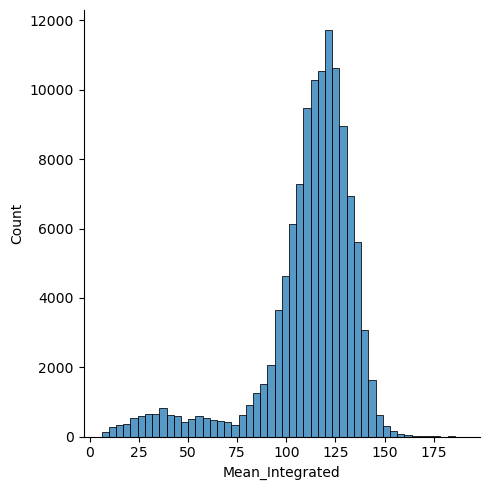

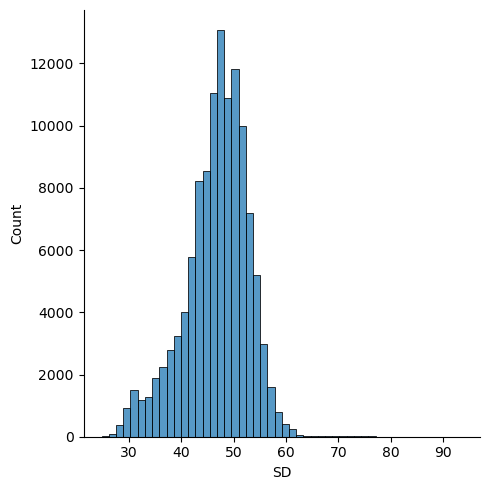

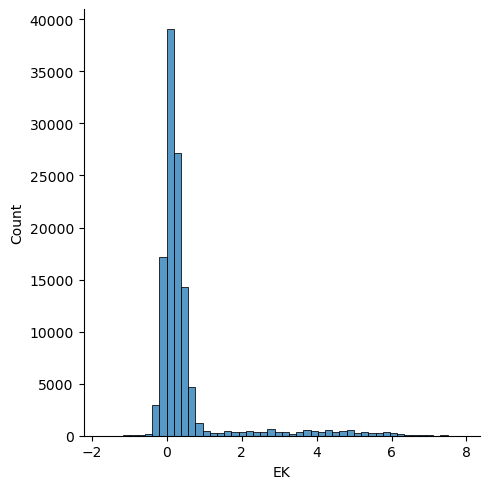

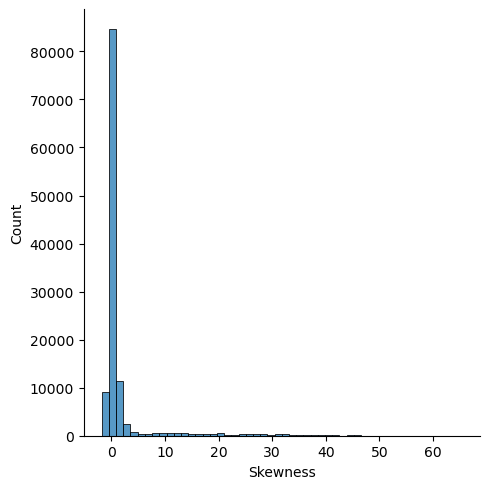

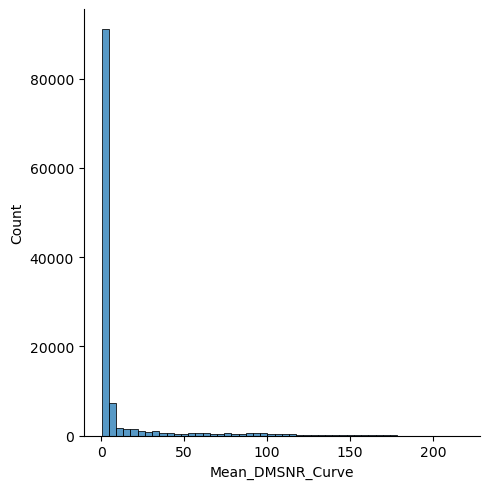

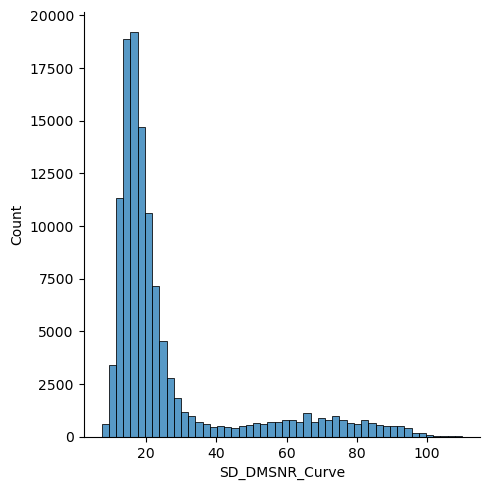

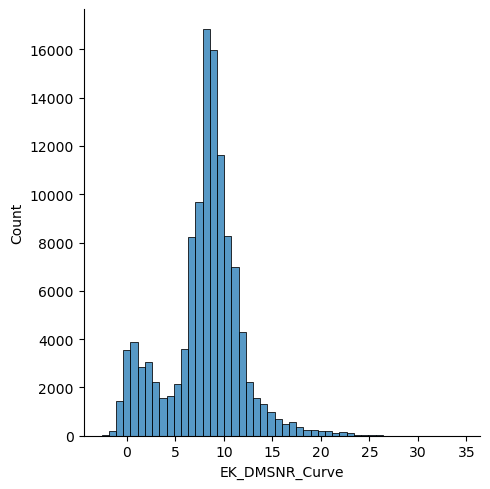

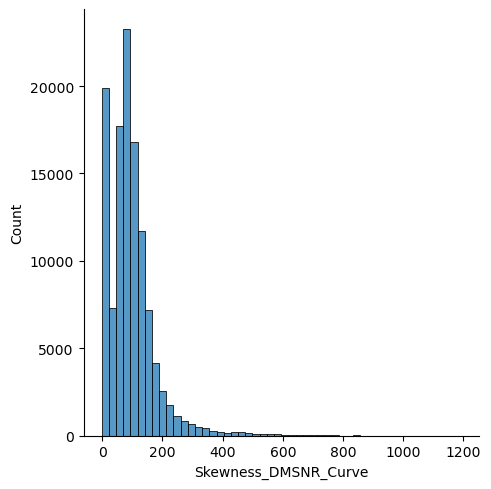

In [11]:
def distribution(df):
    for col in train_data.drop('Class', axis=1).columns:
        sns.displot(data=train_data, x=col, bins =50)
distribution(train_data.drop('Class', axis=1))

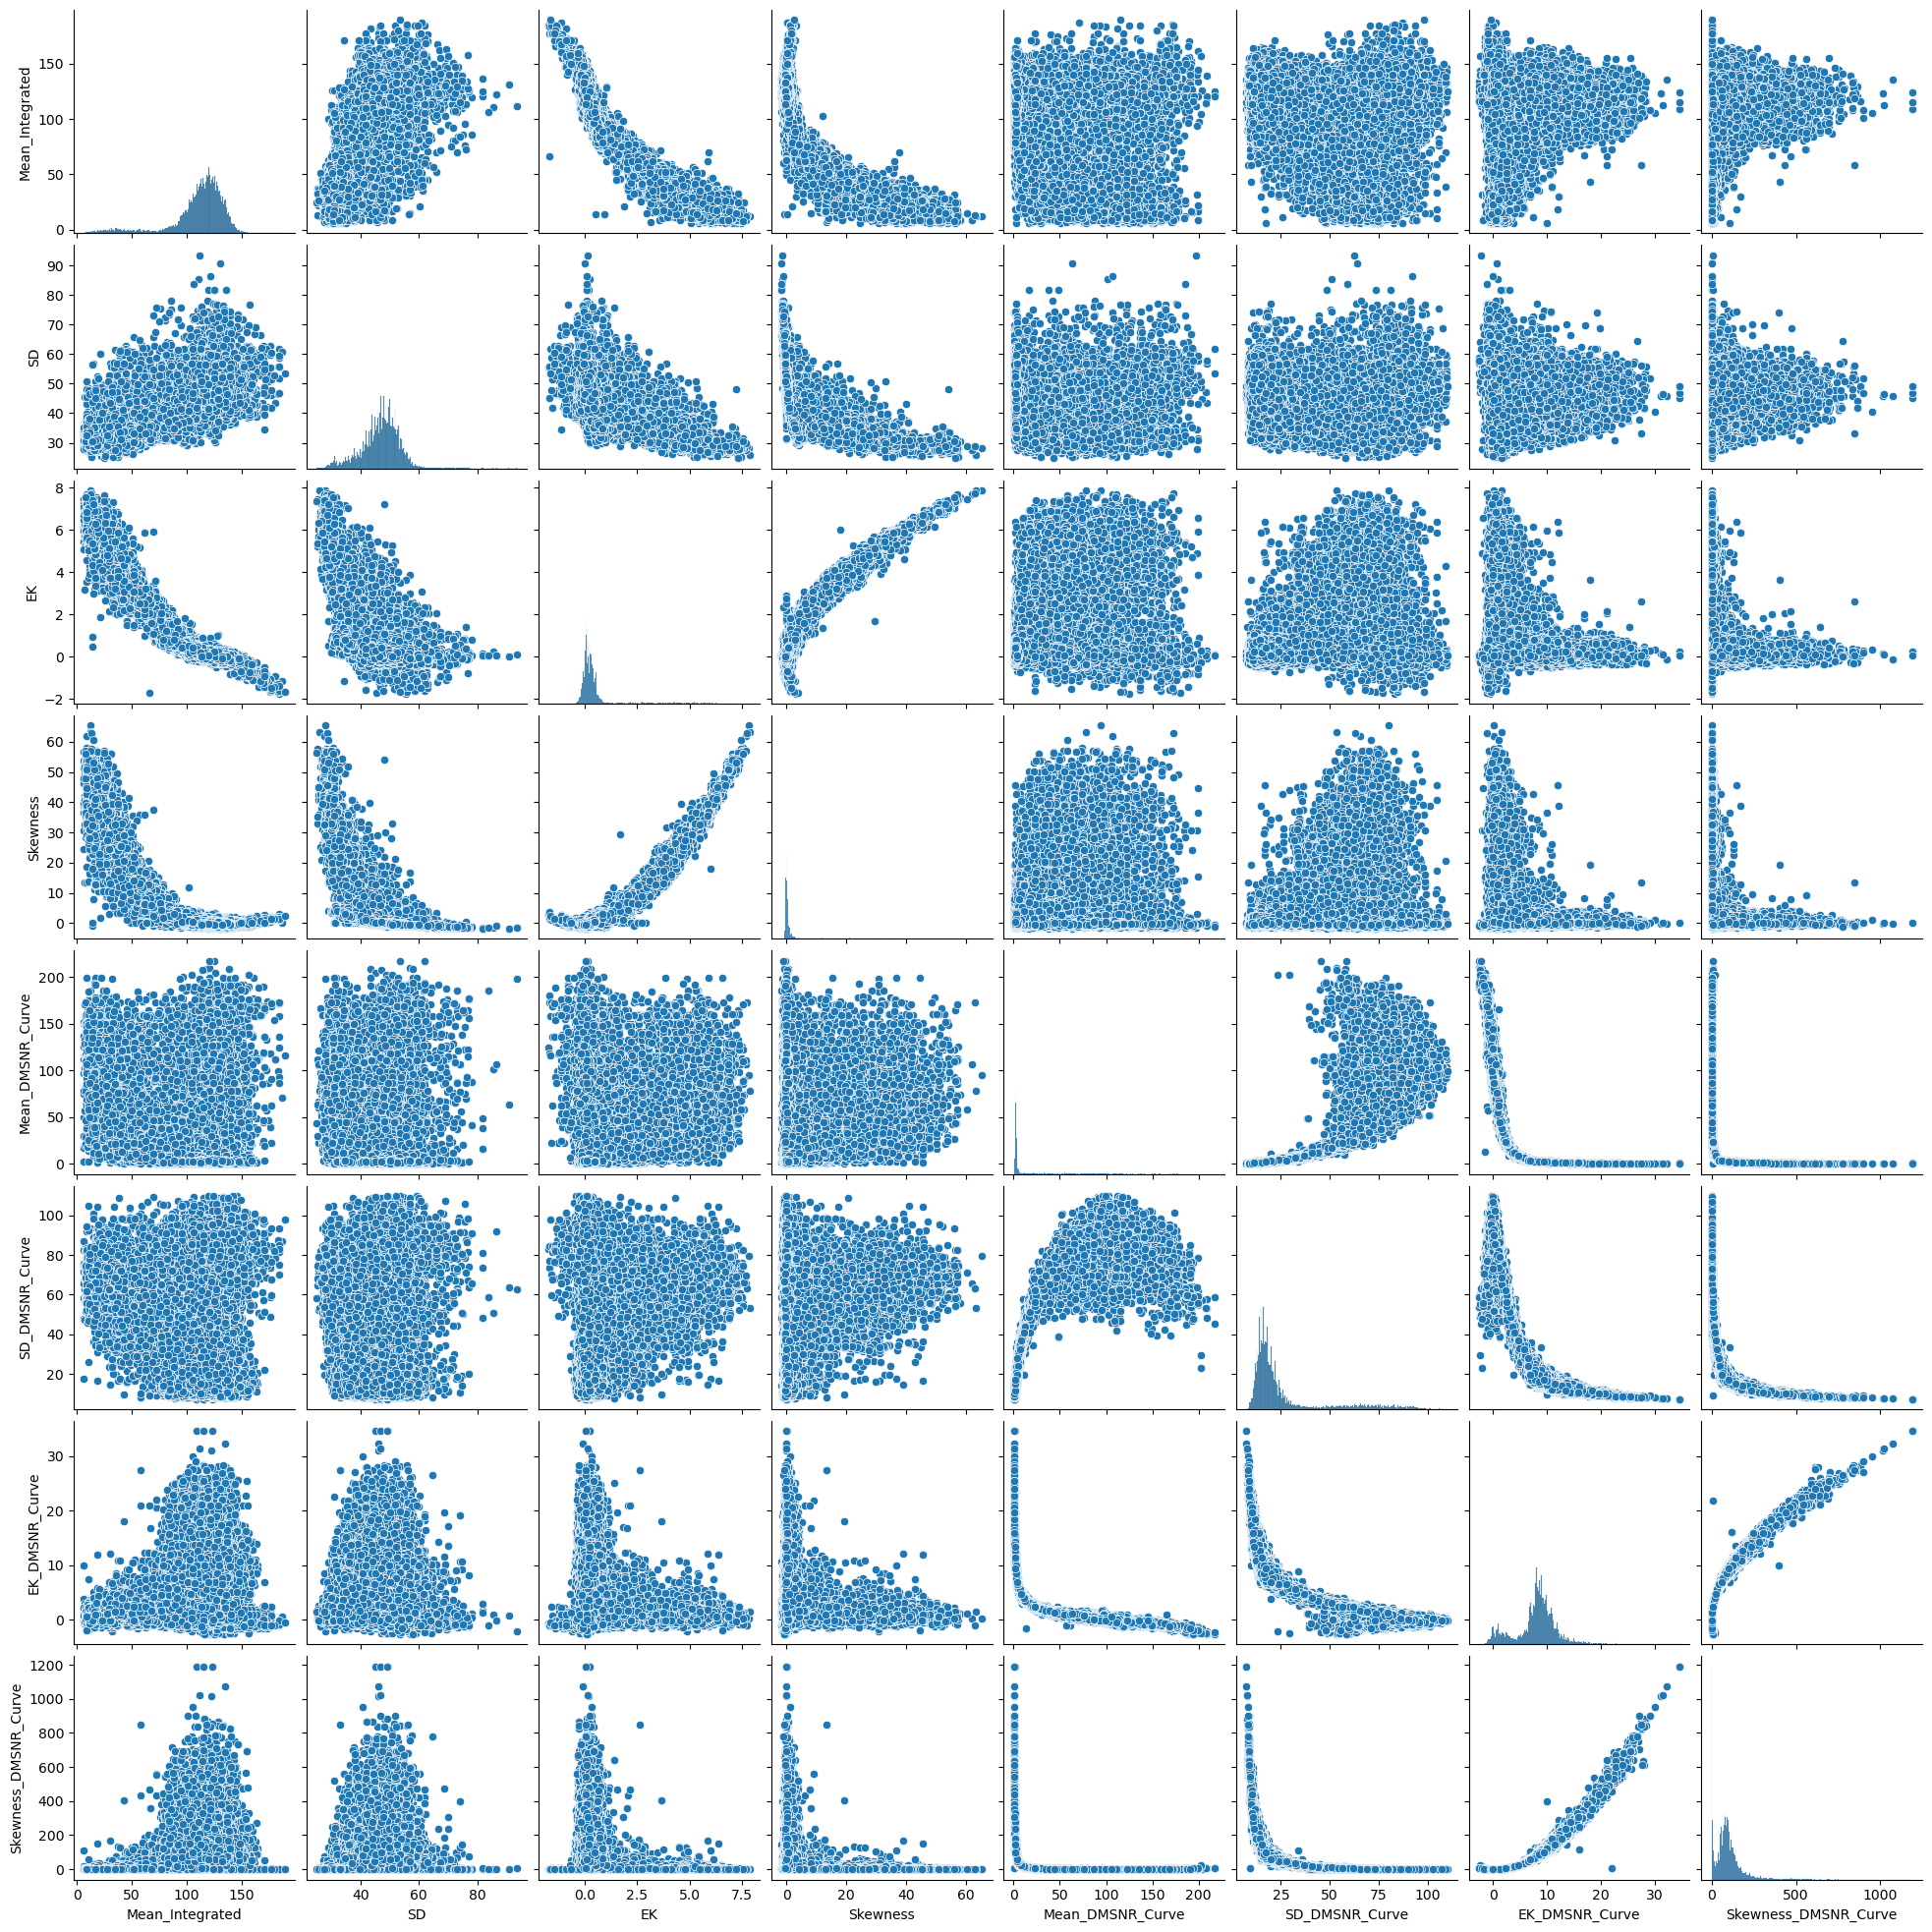

In [12]:
sns.pairplot(train_data.drop('Class', axis=1))

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
features = train_data.drop('Class', axis=1)
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(features)
y_train = train_data['Class']
X_test = scaler.fit_transform(test_data.drop('Class', axis=1))
y_test = test_data['Class']

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [17]:
model = AdaBoostClassifier()

In [18]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [19]:
pred = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [21]:
a = classification_report(y_test, pred)
print(f'Classification Report \n {a}')

b = confusion_matrix(y_test, pred)
print(f'Confusion Matrix  \n{b} \n')

c = accuracy_score(y_test, pred)
print(f'Accuracy score {c}')

Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    106597
           1       0.96      0.93      0.95     10967

    accuracy                           0.99    117564
   macro avg       0.98      0.96      0.97    117564
weighted avg       0.99      0.99      0.99    117564

Confusion Matrix  
[[106183    414]
 [   762  10205]] 

Accuracy score 0.9899969378381137


In [22]:
submission = pd.DataFrame({'id': y_test.index, 'Class': pred})
submission.to_csv('submission.csv', index=False)